## Análise de vendas

Esta análise em como objetivo treinar tecnicas de análise exploratória em uma base de dados de vendas

In [3]:
import pandas as pd

df_vendas = pd.read_csv('dataset_vendas.csv', sep=';')


In [4]:
# realizar leitura das 5 primeiras linhas do dataset

df_vendas.head()


,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7


In [5]:
# realizar leitura das 5 ultimas linhas do dataset

df_vendas.tail()

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3
999,2000,2026-09-26,585,337.97,Eletrônicos,6


In [6]:
# verifica quantas séries e linhas

df_vendas.shape

(1000, 6)

In [7]:
# ver informações do dataset

df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          1000 non-null   int64  
 1   Data_Compra        1000 non-null   object 
 2   Cliente_ID         1000 non-null   int64  
 3   Valor_Total        1000 non-null   float64
 4   Categoria_Produto  1000 non-null   object 
 5   Quantidade         1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [8]:
df_vendas.describe() 

,ID_Pedido,Cliente_ID,Valor_Total,Quantidade
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,549.128000,525.307940,4.945000
std,288.819436,29.573505,275.969012,2.614347
min,1001.000000,500.000000,54.400000,1.000000
25%,1250.750000,523.000000,275.285000,3.000000
50%,1500.500000,550.000000,534.640000,5.000000
75%,1750.250000,574.000000,756.435000,7.000000
max,2000.000000,599.000000,999.440000,9.000000


In [9]:
df_vendas.describe(include='object')

,Data_Compra,Categoria_Produto
count,1000,1000
unique,612,5
top,2025-02-09,Esportes
freq,6,220


In [10]:
df_vendas.nunique()

ID_Pedido            1000
Data_Compra           612
Cliente_ID            100
Valor_Total           996
Categoria_Produto       5
Quantidade              9
dtype: int64

In [11]:
# serve para contar quantos valores nulos (ou ausentes) existem na coluna 

df_vendas['Categoria_Produto'].isnull().sum()

np.int64(0)

In [12]:
# verificar o nome das séries

df_vendas.columns

Index(['ID_Pedido', 'Data_Compra', 'Cliente_ID', 'Valor_Total',
       'Categoria_Produto', 'Quantidade'],
      dtype='object')

In [13]:
# cria uma variavel e transforma o tamanho das letras das colunas em lista

nome_colunas = list(df_vendas.columns)

novas_colunas = []

for coluna in nome_colunas:
    novas_colunas.append(coluna.lower())

df_vendas.columns = novas_colunas

df_vendas.head()

,id_pedido,data_compra,cliente_id,valor_total,categoria_produto,quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7


In [14]:
# forma simplificada de alterar

df_vendas.columns = [coluna.lower() for coluna in list(df_vendas.columns)]

df_vendas

,id_pedido,data_compra,cliente_id,valor_total,categoria_produto,quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7
...,...,...,...,...,...,...
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3


In [15]:
df_vendas['categoria_produto'].value_counts()



categoria_produto
Esportes       220
Beleza         206
Eletrônicos    199
Casa           193
Roupas         182
Name: count, dtype: int64

In [16]:
valores_cliente = df_vendas.groupby('cliente_id')['valor_total'].sum()

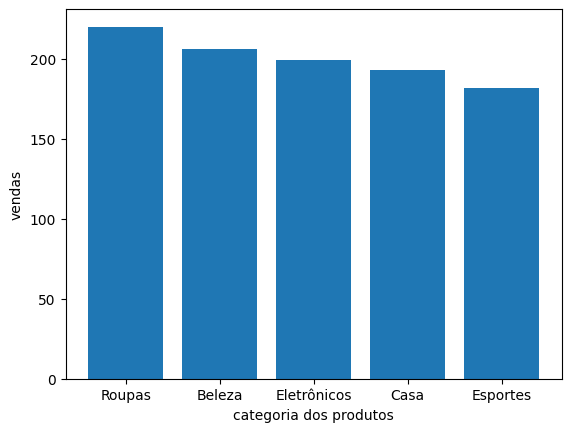

In [27]:
import matplotlib.pyplot as plt

plt.bar(
    df_vendas['categoria_produto'].unique(),
    df_vendas['categoria_produto'].value_counts()
)
plt.title('')
plt.ylabel('vendas')
plt.xlabel('categoria dos produtos')
plt.show()